# Activation Functions

Implementing functions in order to understand, how it works in real time

*. Sigmoid Function

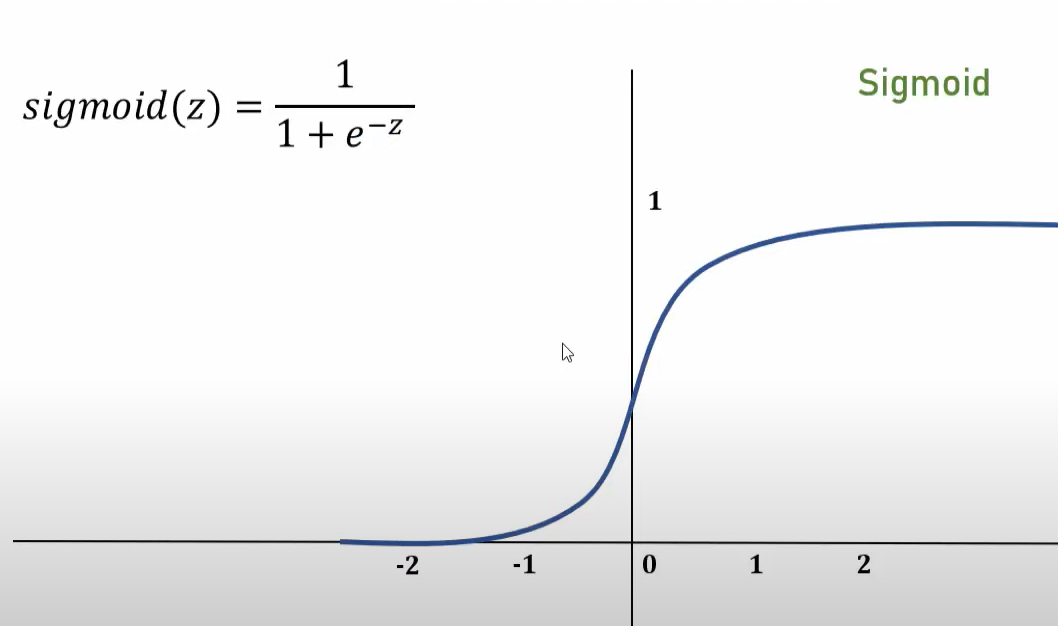

In [1]:
import math

In [2]:
def sigmoid(x):
    return 1 / ( 1 + math.exp(-x) )

In [3]:
sigmoid(100)

1.0

In [4]:
sigmoid(1561)

1.0

In [5]:
sigmoid(-100)

3.7200759760208356e-44

*. tanh function 

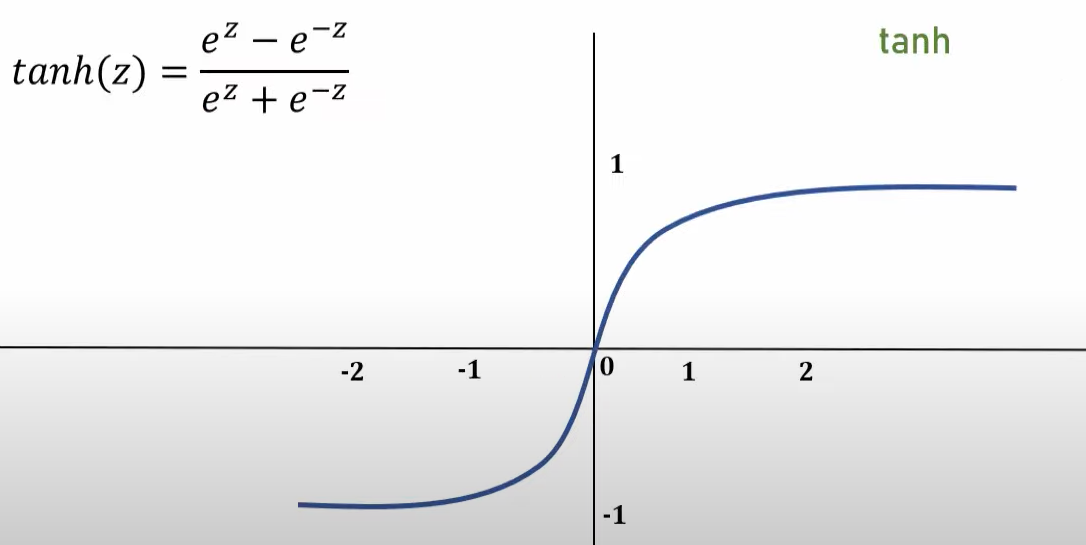

In [6]:
def tanh(z):
    return (math.exp(z) - math.exp(-z)) / (math.exp(z) + math.exp(-z))

In [7]:
tanh(-55)

-1.0

In [8]:
tanh(1)

0.7615941559557649

In [9]:
tanh(2)

0.964027580075817

In [10]:
tanh(3)

0.9950547536867306

In [11]:
tanh(5)

0.999909204262595

In [12]:
tanh(10)

0.9999999958776926

In [13]:
tanh(50)

1.0

*. Relu Function 

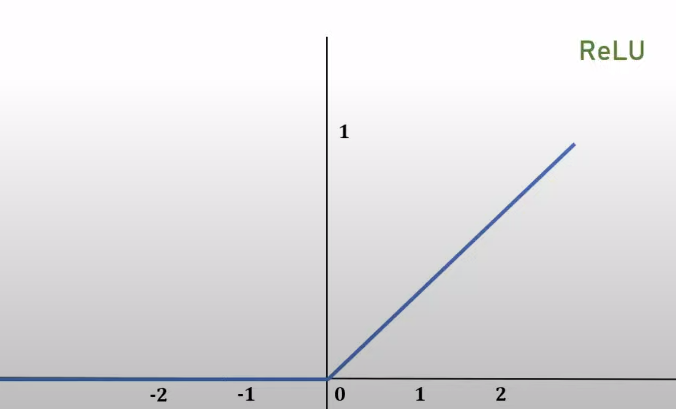

In [14]:
def relu(x):
    return max(0,x)

In [15]:
relu(10)

10

In [16]:
relu(-110)

0

*. Leaky Relu function

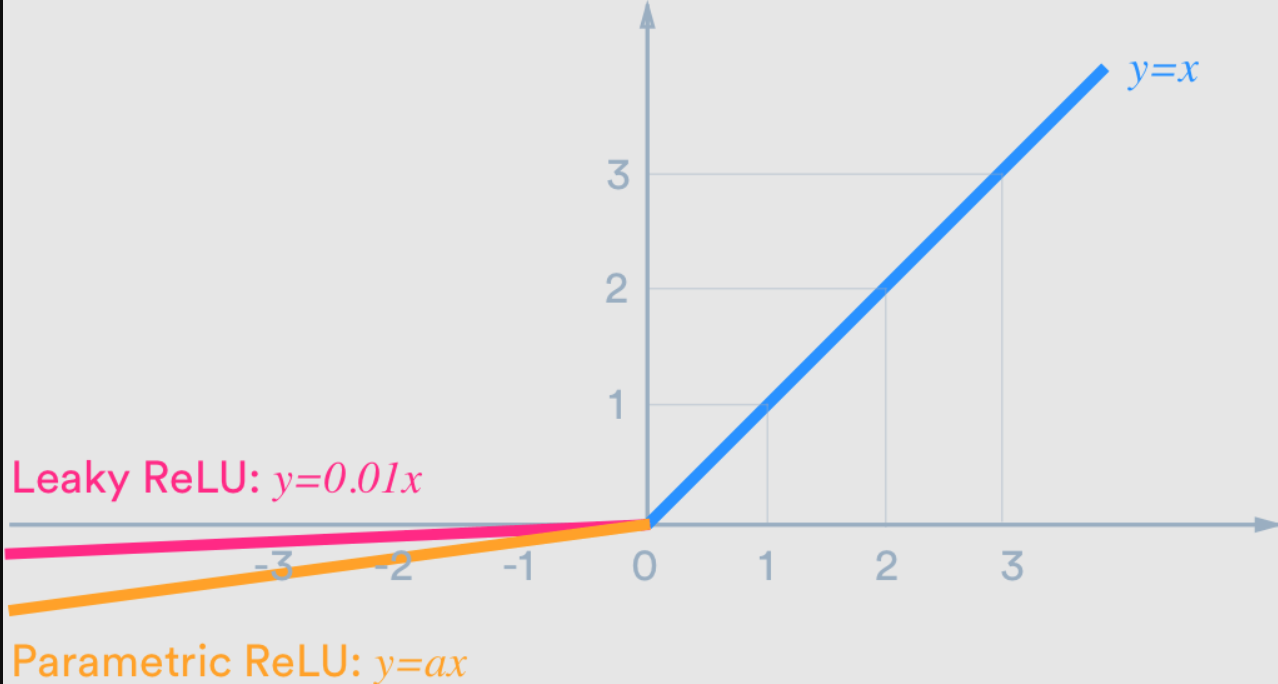

In [17]:
def leakyRelu(x):
    return max( 0.1*x, x)

In [18]:
leakyRelu(123)

123

In [19]:
leakyRelu(0)

0.0

In [20]:
leakyRelu(-122)

-12.200000000000001

Matrix Practice

In [21]:
import numpy as np
a = np.array( [
    [200, 220, 250],
    [68, 79, 105],
    [110, 140, 180],
    [80, 85, 90]
])

In [22]:
a

array([[200, 220, 250],
       [ 68,  79, 105],
       [110, 140, 180],
       [ 80,  85,  90]])

In [23]:
a *75  ### converting dollars to rupees

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])

In [24]:
a = np.array([20, 30, 15])
b = np.array([
    [50, 60, 25],
    [10, 13, 5],
    [40, 70, 52]
])

In [25]:
np.dot(a,b)

array([1900, 2640, 1430])

In [26]:
a = np.array([[20], [30], [15]])
b = np.array([
    [50, 60, 25],
    [10, 13, 5],
    [40, 70, 52]
])

In [27]:
np.dot(a.T, b)   # .T is enough to Transpose a matrix

array([[1900, 2640, 1430]])

# Implementing Loss or Cost Functions

1. Mean Absolute Error

In [28]:
y_pred = np.array([1,1,0,0,1])
y_true = np.array([0.3,0.7,1,0,0.5])

In [29]:
def mae(y_true, y_pred):
    total_err = 0
    for yt,yp in zip(y_true, y_pred):
        total_err += abs(yt - yp)
    print("MAE :: ", total_err / len(y_true))

In [30]:
mae(y_true, y_pred)

MAE ::  0.5


Above function can be replaced by the following one line through the help of numpy

In [31]:
np.mean(np.abs(y_pred - y_true))

0.5

### IMP: Note that cost or loss function is the value of functions like MAE where as loss is the value diff for a particular prediction

In [32]:
# you can use this as well y_pred ** 2 to square a numpy array

2. Mean Squared Error [ MSE ]

In [33]:
np.mean(np.square(np.abs(y_pred - y_true)))

0.366

3. Log Loss or Binary Cross Entropy

In [34]:
epsilon = 1e-15

In [35]:
epsilon ### This one is e^ -120

1e-15

In [36]:
y_pred_new = [ max(i, epsilon) for i in y_pred]
y_pred_new

[1, 1, 1e-15, 1e-15, 1]

In [37]:
y_pred_new = [ min(i, 1-epsilon) for i in y_pred_new]
y_pred_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [38]:
y_pred_new = np.array(y_pred_new)
np.log(y_pred_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [39]:
-np.mean(y_true * np.log(y_pred_new)+(1-y_true)*np.log(1 - y_pred_new))

17.2696280766844

In [40]:
def log_loss(y_true, y_pred):
    y_pred_new = [ max(i, epsilon) for i in y_pred]
    y_pred_new = [ min(i, 1-epsilon) for i in y_pred_new]
    y_pred_new = np.array(y_pred_new)
    return -np.mean(y_true * np.log(y_pred_new)+(1-y_true)*np.log(1 - y_pred_new))

In [41]:
log_loss(y_true, y_pred)

17.2696280766844

### Implimenting Gradient Descent

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv("insurance_data.csv")

In [44]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age','affordibility']], df.bought_insurance, test_size = 0.2, random_state = 25)

In [46]:
x_train

,age,affordibility
0,22,1
13,29,0
6,55,0
17,58,1
24,50,1
19,18,1
25,54,1
16,25,0
20,21,1
3,52,0


In [47]:
len(x_train)

22

In [48]:
len(x_test)

6

In [49]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age']/100

x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age']/100

In [50]:
x_train_scaled

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1
19,0.18,1
25,0.54,1
16,0.25,0
20,0.21,1
3,0.52,0


In [51]:
x_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [53]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (2,), activation = 'sigmoid', kernel_initializer = 'ones', bias_initializer = 'zeros')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']

)

model.fit(x_train_scaled, y_train, epochs = 5400)

Epoch 1/5400
1/1 [==============================] - 0s 443ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5400
1/1

1/1 [==============================] - 0s 6ms/step - loss: 0.6835 - accuracy: 0.5000
Epoch 84/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6832 - accuracy: 0.5000
Epoch 85/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6829 - accuracy: 0.5000
Epoch 86/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5000
Epoch 87/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6823 - accuracy: 0.5000
Epoch 88/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6820 - accuracy: 0.5000
Epoch 89/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.5000
Epoch 90/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.6814 - accuracy: 0.5000
Epoch 91/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6811 - accuracy: 0.5000
Epoch 92/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.5000
Epoch 93/5400
1/1 [====

1/1 [==============================] - 0s 7ms/step - loss: 0.6626 - accuracy: 0.5000
Epoch 166/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6624 - accuracy: 0.5000
Epoch 167/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6622 - accuracy: 0.5000
Epoch 168/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6620 - accuracy: 0.5000
Epoch 169/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6617 - accuracy: 0.5000
Epoch 170/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.5000
Epoch 171/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6613 - accuracy: 0.5000
Epoch 172/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6611 - accuracy: 0.5000
Epoch 173/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6609 - accuracy: 0.5455
Epoch 174/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6607 - accuracy: 0.5455
Epoch 175/5400


1/1 [==============================] - 0s 7ms/step - loss: 0.6479 - accuracy: 0.5909
Epoch 248/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6477 - accuracy: 0.5909
Epoch 249/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6476 - accuracy: 0.5909
Epoch 250/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6474 - accuracy: 0.5909
Epoch 251/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6473 - accuracy: 0.5909
Epoch 252/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6471 - accuracy: 0.5909
Epoch 253/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6470 - accuracy: 0.5909
Epoch 254/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6468 - accuracy: 0.5909
Epoch 255/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.5909
Epoch 256/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.5909
Epoch 257/5400


1/1 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.6364
Epoch 330/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6377 - accuracy: 0.6364
Epoch 331/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6376 - accuracy: 0.6364
Epoch 332/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6375 - accuracy: 0.6364
Epoch 333/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6374 - accuracy: 0.6364
Epoch 334/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6373 - accuracy: 0.6364
Epoch 335/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6372 - accuracy: 0.6364
Epoch 336/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6364
Epoch 337/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6370 - accuracy: 0.6364
Epoch 338/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6369 - accuracy: 0.6364
Epoch 339/5400


1/1 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.6364
Epoch 412/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6308 - accuracy: 0.6364
Epoch 413/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6307 - accuracy: 0.6364
Epoch 414/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6307 - accuracy: 0.6364
Epoch 415/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6306 - accuracy: 0.6364
Epoch 416/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6305 - accuracy: 0.6364
Epoch 417/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6305 - accuracy: 0.6364
Epoch 418/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6304 - accuracy: 0.6364
Epoch 419/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6303 - accuracy: 0.6364
Epoch 420/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6302 - accuracy: 0.6364
Epoch 421/5400


1/1 [==============================] - 0s 13ms/step - loss: 0.6257 - accuracy: 0.6364
Epoch 494/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6257 - accuracy: 0.6364
Epoch 495/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6256 - accuracy: 0.6364
Epoch 496/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6256 - accuracy: 0.6364
Epoch 497/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6255 - accuracy: 0.6364
Epoch 498/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6255 - accuracy: 0.6364
Epoch 499/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.6254 - accuracy: 0.6364
Epoch 500/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6253 - accuracy: 0.6364
Epoch 501/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6253 - accuracy: 0.6364
Epoch 502/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6252 - accuracy: 0.6364
Epoch 503/540

1/1 [==============================] - 0s 8ms/step - loss: 0.6214 - accuracy: 0.6818
Epoch 576/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.6818
Epoch 577/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6213 - accuracy: 0.6818
Epoch 578/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6213 - accuracy: 0.6818
Epoch 579/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 580/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 581/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6211 - accuracy: 0.6818
Epoch 582/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6211 - accuracy: 0.6818
Epoch 583/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6210 - accuracy: 0.6818
Epoch 584/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6210 - accuracy: 0.6818
Epoch 585/5400


1/1 [==============================] - 0s 7ms/step - loss: 0.6174 - accuracy: 0.7273
Epoch 658/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.7273
Epoch 659/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6173 - accuracy: 0.7273
Epoch 660/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6173 - accuracy: 0.7273
Epoch 661/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6172 - accuracy: 0.7273
Epoch 662/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6172 - accuracy: 0.7273
Epoch 663/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6171 - accuracy: 0.7273
Epoch 664/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6171 - accuracy: 0.7273
Epoch 665/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.7273
Epoch 666/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6170 - accuracy: 0.7273
Epoch 667/5400


1/1 [==============================] - 0s 5ms/step - loss: 0.6135 - accuracy: 0.7273
Epoch 740/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6134 - accuracy: 0.7273
Epoch 741/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6134 - accuracy: 0.7273
Epoch 742/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6133 - accuracy: 0.7273
Epoch 743/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.7273
Epoch 744/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.7273
Epoch 745/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6132 - accuracy: 0.7273
Epoch 746/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.7273
Epoch 747/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6131 - accuracy: 0.7273
Epoch 748/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6130 - accuracy: 0.7273
Epoch 749/5400


1/1 [==============================] - 0s 8ms/step - loss: 0.6095 - accuracy: 0.7273
Epoch 822/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6094 - accuracy: 0.7273
Epoch 823/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.6094 - accuracy: 0.7273
Epoch 824/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.7273
Epoch 825/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6093 - accuracy: 0.7273
Epoch 826/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6092 - accuracy: 0.7273
Epoch 827/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6092 - accuracy: 0.7273
Epoch 828/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.6091 - accuracy: 0.7273
Epoch 829/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6091 - accuracy: 0.7273
Epoch 830/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.7273
Epoch 831/540

1/1 [==============================] - 0s 6ms/step - loss: 0.6054 - accuracy: 0.6818
Epoch 904/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6054 - accuracy: 0.6818
Epoch 905/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6818
Epoch 906/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.6818
Epoch 907/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6052 - accuracy: 0.6818
Epoch 908/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.6818
Epoch 909/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6051 - accuracy: 0.6818
Epoch 910/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6051 - accuracy: 0.6818
Epoch 911/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.6818
Epoch 912/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.6050 - accuracy: 0.6818
Epoch 913/5400


1/1 [==============================] - 0s 6ms/step - loss: 0.6014 - accuracy: 0.6818
Epoch 986/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.6818
Epoch 987/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6013 - accuracy: 0.6818
Epoch 988/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.6012 - accuracy: 0.6818
Epoch 989/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6012 - accuracy: 0.6818
Epoch 990/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.6818
Epoch 991/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.6011 - accuracy: 0.6818
Epoch 992/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6010 - accuracy: 0.6818
Epoch 993/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.6010 - accuracy: 0.6818
Epoch 994/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.6009 - accuracy: 0.6818
Epoch 995/5400

1/1 [==============================] - 0s 8ms/step - loss: 0.5973 - accuracy: 0.6818
Epoch 1067/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5973 - accuracy: 0.6818
Epoch 1068/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5972 - accuracy: 0.6818
Epoch 1069/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5972 - accuracy: 0.6818
Epoch 1070/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5971 - accuracy: 0.6818
Epoch 1071/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5971 - accuracy: 0.6818
Epoch 1072/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5970 - accuracy: 0.6818
Epoch 1073/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5970 - accuracy: 0.6818
Epoch 1074/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5969 - accuracy: 0.6818
Epoch 1075/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5969 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5933 - accuracy: 0.6818
Epoch 1148/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5932 - accuracy: 0.6818
Epoch 1149/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5932 - accuracy: 0.6818
Epoch 1150/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.5931 - accuracy: 0.6818
Epoch 1151/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5931 - accuracy: 0.6818
Epoch 1152/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5930 - accuracy: 0.6818
Epoch 1153/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5930 - accuracy: 0.6818
Epoch 1154/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5929 - accuracy: 0.6818
Epoch 1155/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5929 - accuracy: 0.6818
Epoch 1156/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5928 - accuracy: 0.6818
Epoch

1/1 [==============================] - 0s 5ms/step - loss: 0.5893 - accuracy: 0.6818
Epoch 1229/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5892 - accuracy: 0.6818
Epoch 1230/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5892 - accuracy: 0.6818
Epoch 1231/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5891 - accuracy: 0.6818
Epoch 1232/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5891 - accuracy: 0.6818
Epoch 1233/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5890 - accuracy: 0.6818
Epoch 1234/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5890 - accuracy: 0.6818
Epoch 1235/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5889 - accuracy: 0.6818
Epoch 1236/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5889 - accuracy: 0.6818
Epoch 1237/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5888 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5852 - accuracy: 0.6818
Epoch 1310/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5852 - accuracy: 0.6818
Epoch 1311/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5851 - accuracy: 0.6818
Epoch 1312/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5851 - accuracy: 0.6818
Epoch 1313/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5850 - accuracy: 0.6818
Epoch 1314/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5850 - accuracy: 0.6818
Epoch 1315/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5849 - accuracy: 0.6818
Epoch 1316/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5849 - accuracy: 0.6818
Epoch 1317/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5848 - accuracy: 0.6818
Epoch 1318/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5848 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1391/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1392/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1393/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5811 - accuracy: 0.6818
Epoch 1394/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.6818
Epoch 1395/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5810 - accuracy: 0.6818
Epoch 1396/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5810 - accuracy: 0.6818
Epoch 1397/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5809 - accuracy: 0.6818
Epoch 1398/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5809 - accuracy: 0.6818
Epoch 1399/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5808 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.6818
Epoch 1472/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5773 - accuracy: 0.6818
Epoch 1473/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5772 - accuracy: 0.6818
Epoch 1474/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5772 - accuracy: 0.6818
Epoch 1475/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5771 - accuracy: 0.6818
Epoch 1476/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5771 - accuracy: 0.6818
Epoch 1477/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5770 - accuracy: 0.6818
Epoch 1478/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5770 - accuracy: 0.6818
Epoch 1479/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.6818
Epoch 1480/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5769 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5734 - accuracy: 0.6818
Epoch 1553/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5733 - accuracy: 0.6818
Epoch 1554/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.6818
Epoch 1555/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5733 - accuracy: 0.6818
Epoch 1556/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5732 - accuracy: 0.6818
Epoch 1557/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5732 - accuracy: 0.6818
Epoch 1558/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5731 - accuracy: 0.6818
Epoch 1559/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.6818
Epoch 1560/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5730 - accuracy: 0.6818
Epoch 1561/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5730 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5695 - accuracy: 0.6818
Epoch 1634/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5695 - accuracy: 0.6818
Epoch 1635/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.6818
Epoch 1636/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5694 - accuracy: 0.6818
Epoch 1637/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.6818
Epoch 1638/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5693 - accuracy: 0.6818
Epoch 1639/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5693 - accuracy: 0.6818
Epoch 1640/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.6818
Epoch 1641/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5692 - accuracy: 0.6818
Epoch 1642/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5691 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5657 - accuracy: 0.6818
Epoch 1715/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5657 - accuracy: 0.6818
Epoch 1716/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5656 - accuracy: 0.6818
Epoch 1717/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5656 - accuracy: 0.6818
Epoch 1718/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5656 - accuracy: 0.6818
Epoch 1719/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5655 - accuracy: 0.6818
Epoch 1720/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5655 - accuracy: 0.6818
Epoch 1721/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5654 - accuracy: 0.6818
Epoch 1722/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5654 - accuracy: 0.6818
Epoch 1723/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5653 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5620 - accuracy: 0.6818
Epoch 1796/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5619 - accuracy: 0.6818
Epoch 1797/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5619 - accuracy: 0.6818
Epoch 1798/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5619 - accuracy: 0.6818
Epoch 1799/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.6818
Epoch 1800/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.6818
Epoch 1801/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5617 - accuracy: 0.6818
Epoch 1802/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5617 - accuracy: 0.6818
Epoch 1803/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5616 - accuracy: 0.6818
Epoch 1804/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5616 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.6818
Epoch 1877/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5583 - accuracy: 0.6818
Epoch 1878/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.5582 - accuracy: 0.6818
Epoch 1879/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.5582 - accuracy: 0.6818
Epoch 1880/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5581 - accuracy: 0.6818
Epoch 1881/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5581 - accuracy: 0.6818
Epoch 1882/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.5580 - accuracy: 0.6818
Epoch 1883/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5580 - accuracy: 0.6818
Epoch 1884/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5580 - accuracy: 0.6818
Epoch 1885/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5579 - accuracy: 0.6818
Epo

1/1 [==============================] - 0s 7ms/step - loss: 0.5547 - accuracy: 0.6818
Epoch 1958/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5547 - accuracy: 0.6818
Epoch 1959/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.6818
Epoch 1960/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.6818
Epoch 1961/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5545 - accuracy: 0.6818
Epoch 1962/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5545 - accuracy: 0.6818
Epoch 1963/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5544 - accuracy: 0.6818
Epoch 1964/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.6818
Epoch 1965/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5543 - accuracy: 0.6818
Epoch 1966/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5543 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5511 - accuracy: 0.6818
Epoch 2039/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5511 - accuracy: 0.6818
Epoch 2040/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5511 - accuracy: 0.6818
Epoch 2041/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5510 - accuracy: 0.6818
Epoch 2042/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5510 - accuracy: 0.6818
Epoch 2043/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5509 - accuracy: 0.6818
Epoch 2044/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5509 - accuracy: 0.6818
Epoch 2045/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5508 - accuracy: 0.6818
Epoch 2046/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.6818
Epoch 2047/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5508 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5477 - accuracy: 0.6818
Epoch 2120/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5476 - accuracy: 0.6818
Epoch 2121/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5476 - accuracy: 0.6818
Epoch 2122/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5475 - accuracy: 0.6818
Epoch 2123/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5475 - accuracy: 0.6818
Epoch 2124/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5474 - accuracy: 0.6818
Epoch 2125/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5474 - accuracy: 0.6818
Epoch 2126/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5474 - accuracy: 0.6818
Epoch 2127/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5473 - accuracy: 0.6818
Epoch 2128/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5473 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5442 - accuracy: 0.6818
Epoch 2201/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5442 - accuracy: 0.6818
Epoch 2202/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5442 - accuracy: 0.6818
Epoch 2203/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5441 - accuracy: 0.6818
Epoch 2204/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5441 - accuracy: 0.6818
Epoch 2205/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.6818
Epoch 2206/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5440 - accuracy: 0.6818
Epoch 2207/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5440 - accuracy: 0.6818
Epoch 2208/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5439 - accuracy: 0.6818
Epoch 2209/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5439 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.5409 - accuracy: 0.7273
Epoch 2282/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5409 - accuracy: 0.7273
Epoch 2283/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5408 - accuracy: 0.7273
Epoch 2284/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5408 - accuracy: 0.7273
Epoch 2285/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.5407 - accuracy: 0.7273
Epoch 2286/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5407 - accuracy: 0.7273
Epoch 2287/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5406 - accuracy: 0.7273
Epoch 2288/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5406 - accuracy: 0.7273
Epoch 2289/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5406 - accuracy: 0.7273
Epoch 2290/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5405 - accuracy: 0.7273
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7273
Epoch 2363/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5376 - accuracy: 0.7273
Epoch 2364/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5375 - accuracy: 0.7273
Epoch 2365/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5375 - accuracy: 0.7273
Epoch 2366/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5375 - accuracy: 0.7273
Epoch 2367/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5374 - accuracy: 0.7273
Epoch 2368/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5374 - accuracy: 0.7273
Epoch 2369/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5373 - accuracy: 0.7273
Epoch 2370/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5373 - accuracy: 0.7273
Epoch 2371/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5373 - accuracy: 0.7273
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.5344 - accuracy: 0.7273
Epoch 2444/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5344 - accuracy: 0.7273
Epoch 2445/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5343 - accuracy: 0.7273
Epoch 2446/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5343 - accuracy: 0.7273
Epoch 2447/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5342 - accuracy: 0.7273
Epoch 2448/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5342 - accuracy: 0.7273
Epoch 2449/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5342 - accuracy: 0.7273
Epoch 2450/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5341 - accuracy: 0.7273
Epoch 2451/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5341 - accuracy: 0.7273
Epoch 2452/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5341 - accuracy: 0.7273
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5313 - accuracy: 0.7273
Epoch 2525/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5312 - accuracy: 0.7273
Epoch 2526/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5312 - accuracy: 0.7273
Epoch 2527/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5311 - accuracy: 0.7273
Epoch 2528/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5311 - accuracy: 0.7273
Epoch 2529/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5311 - accuracy: 0.7273
Epoch 2530/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5310 - accuracy: 0.7273
Epoch 2531/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5310 - accuracy: 0.7273
Epoch 2532/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5310 - accuracy: 0.7273
Epoch 2533/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5309 - accuracy: 0.7273
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5282 - accuracy: 0.7273
Epoch 2606/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5282 - accuracy: 0.7273
Epoch 2607/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5281 - accuracy: 0.7273
Epoch 2608/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5281 - accuracy: 0.7273
Epoch 2609/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5280 - accuracy: 0.7273
Epoch 2610/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5280 - accuracy: 0.7273
Epoch 2611/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5280 - accuracy: 0.7273
Epoch 2612/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5279 - accuracy: 0.7273
Epoch 2613/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5279 - accuracy: 0.7273
Epoch 2614/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5279 - accuracy: 0.7273
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5252 - accuracy: 0.7727
Epoch 2687/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5251 - accuracy: 0.7727
Epoch 2688/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5251 - accuracy: 0.7727
Epoch 2689/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5251 - accuracy: 0.7727
Epoch 2690/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5250 - accuracy: 0.7727
Epoch 2691/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5250 - accuracy: 0.7727
Epoch 2692/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5250 - accuracy: 0.7727
Epoch 2693/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7727
Epoch 2694/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5249 - accuracy: 0.7727
Epoch 2695/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.7727
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5222 - accuracy: 0.7727
Epoch 2768/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5222 - accuracy: 0.7727
Epoch 2769/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5222 - accuracy: 0.7727
Epoch 2770/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5221 - accuracy: 0.7727
Epoch 2771/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5221 - accuracy: 0.7727
Epoch 2772/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5221 - accuracy: 0.7727
Epoch 2773/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5220 - accuracy: 0.7727
Epoch 2774/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5220 - accuracy: 0.7727
Epoch 2775/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5220 - accuracy: 0.7727
Epoch 2776/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5219 - accuracy: 0.7727
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5194 - accuracy: 0.8182
Epoch 2849/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.8182
Epoch 2850/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.8182
Epoch 2851/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.8182
Epoch 2852/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 2853/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 2854/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5192 - accuracy: 0.8182
Epoch 2855/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5191 - accuracy: 0.8182
Epoch 2856/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5191 - accuracy: 0.8182
Epoch 2857/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5191 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.5166 - accuracy: 0.8182
Epoch 2930/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5165 - accuracy: 0.8182
Epoch 2931/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5165 - accuracy: 0.8182
Epoch 2932/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5165 - accuracy: 0.8182
Epoch 2933/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5164 - accuracy: 0.8182
Epoch 2934/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5164 - accuracy: 0.8182
Epoch 2935/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5164 - accuracy: 0.8182
Epoch 2936/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5163 - accuracy: 0.8182
Epoch 2937/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5163 - accuracy: 0.8182
Epoch 2938/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5163 - accuracy: 0.8182
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.5138 - accuracy: 0.8636
Epoch 3011/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.5138 - accuracy: 0.8636
Epoch 3012/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.8636
Epoch 3013/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.8636
Epoch 3014/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5137 - accuracy: 0.8636
Epoch 3015/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.8636
Epoch 3016/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.8636
Epoch 3017/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.8636
Epoch 3018/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5135 - accuracy: 0.8636
Epoch 3019/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5135 - accuracy: 0.8636
Epoch

1/1 [==============================] - 0s 27ms/step - loss: 0.5111 - accuracy: 0.8636
Epoch 3092/5400
1/1 [==============================] - 0s 22ms/step - loss: 0.5111 - accuracy: 0.8636
Epoch 3093/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.5111 - accuracy: 0.8636
Epoch 3094/5400
1/1 [==============================] - 0s 14ms/step - loss: 0.5110 - accuracy: 0.8636
Epoch 3095/5400
1/1 [==============================] - 0s 14ms/step - loss: 0.5110 - accuracy: 0.8636
Epoch 3096/5400
1/1 [==============================] - 0s 33ms/step - loss: 0.5110 - accuracy: 0.8636
Epoch 3097/5400
1/1 [==============================] - 0s 18ms/step - loss: 0.5109 - accuracy: 0.8636
Epoch 3098/5400
1/1 [==============================] - 0s 16ms/step - loss: 0.5109 - accuracy: 0.8636
Epoch 3099/5400
1/1 [==============================] - 0s 19ms/step - loss: 0.5109 - accuracy: 0.8636
Epoch 3100/5400
1/1 [==============================] - 0s 16ms/step - loss: 0.5108 - accuracy: 0.8

1/1 [==============================] - 0s 9ms/step - loss: 0.5085 - accuracy: 0.8636
Epoch 3172/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5085 - accuracy: 0.8636
Epoch 3173/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.5085 - accuracy: 0.8636
Epoch 3174/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5084 - accuracy: 0.8636
Epoch 3175/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5084 - accuracy: 0.8636
Epoch 3176/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.5084 - accuracy: 0.8636
Epoch 3177/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.5084 - accuracy: 0.8636
Epoch 3178/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5083 - accuracy: 0.8636
Epoch 3179/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.5083 - accuracy: 0.8636
Epoch 3180/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.5083 - accuracy: 0.8636
Epo

1/1 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.9091
Epoch 3253/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5060 - accuracy: 0.9091
Epoch 3254/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5059 - accuracy: 0.9091
Epoch 3255/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5059 - accuracy: 0.9091
Epoch 3256/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5059 - accuracy: 0.9091
Epoch 3257/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.9091
Epoch 3258/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.9091
Epoch 3259/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.9091
Epoch 3260/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.9091
Epoch 3261/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5057 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5035 - accuracy: 0.9091
Epoch 3334/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5035 - accuracy: 0.9091
Epoch 3335/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5034 - accuracy: 0.9091
Epoch 3336/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5034 - accuracy: 0.9091
Epoch 3337/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.5034 - accuracy: 0.9091
Epoch 3338/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.9091
Epoch 3339/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.9091
Epoch 3340/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5033 - accuracy: 0.9091
Epoch 3341/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5032 - accuracy: 0.9091
Epoch 3342/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5032 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.5010 - accuracy: 0.9091
Epoch 3415/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.5010 - accuracy: 0.9091
Epoch 3416/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5010 - accuracy: 0.9091
Epoch 3417/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 0.9091
Epoch 3418/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 0.9091
Epoch 3419/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 0.9091
Epoch 3420/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5009 - accuracy: 0.9091
Epoch 3421/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5008 - accuracy: 0.9091
Epoch 3422/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5008 - accuracy: 0.9091
Epoch 3423/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.5008 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.9091
Epoch 3496/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.9091
Epoch 3497/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.9091
Epoch 3498/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4986 - accuracy: 0.9091
Epoch 3499/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4985 - accuracy: 0.9091
Epoch 3500/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4985 - accuracy: 0.9091
Epoch 3501/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4985 - accuracy: 0.9091
Epoch 3502/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.9091
Epoch 3503/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.9091
Epoch 3504/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4984 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4963 - accuracy: 0.9091
Epoch 3577/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4963 - accuracy: 0.9091
Epoch 3578/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4963 - accuracy: 0.9091
Epoch 3579/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4962 - accuracy: 0.9091
Epoch 3580/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.9091
Epoch 3581/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4962 - accuracy: 0.9091
Epoch 3582/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.9091
Epoch 3583/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.9091
Epoch 3584/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.9091
Epoch 3585/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4961 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4940 - accuracy: 0.9091
Epoch 3658/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.9091
Epoch 3659/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.9091
Epoch 3660/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.9091
Epoch 3661/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.9091
Epoch 3662/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4939 - accuracy: 0.9091
Epoch 3663/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4939 - accuracy: 0.9091
Epoch 3664/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.9091
Epoch 3665/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.9091
Epoch 3666/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.9091
Epoch 3739/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.9091
Epoch 3740/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4918 - accuracy: 0.9091
Epoch 3741/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4917 - accuracy: 0.9091
Epoch 3742/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4917 - accuracy: 0.9091
Epoch 3743/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4917 - accuracy: 0.9091
Epoch 3744/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.9091
Epoch 3745/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4916 - accuracy: 0.9091
Epoch 3746/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.9091
Epoch 3747/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4916 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 10ms/step - loss: 0.4896 - accuracy: 0.9091
Epoch 3820/5400
1/1 [==============================] - 0s 13ms/step - loss: 0.4896 - accuracy: 0.9091
Epoch 3821/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.4896 - accuracy: 0.9091
Epoch 3822/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4896 - accuracy: 0.9091
Epoch 3823/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4895 - accuracy: 0.9091
Epoch 3824/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4895 - accuracy: 0.9091
Epoch 3825/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4895 - accuracy: 0.9091
Epoch 3826/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4894 - accuracy: 0.9091
Epoch 3827/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4894 - accuracy: 0.9091
Epoch 3828/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4894 - accuracy: 0.9091


1/1 [==============================] - 0s 8ms/step - loss: 0.4875 - accuracy: 0.9091
Epoch 3901/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4875 - accuracy: 0.9091
Epoch 3902/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4875 - accuracy: 0.9091
Epoch 3903/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4874 - accuracy: 0.9091
Epoch 3904/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4874 - accuracy: 0.9091
Epoch 3905/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4874 - accuracy: 0.9091
Epoch 3906/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4874 - accuracy: 0.9091
Epoch 3907/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4873 - accuracy: 0.9091
Epoch 3908/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.9091
Epoch 3909/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.9091
Epoch 3982/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.9091
Epoch 3983/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.9091
Epoch 3984/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.9091
Epoch 3985/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4853 - accuracy: 0.9091
Epoch 3986/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4853 - accuracy: 0.9091
Epoch 3987/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4853 - accuracy: 0.9091
Epoch 3988/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4853 - accuracy: 0.9091
Epoch 3989/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.4852 - accuracy: 0.9091
Epoch 3990/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4852 - accuracy: 0.9091
Epo

1/1 [==============================] - 0s 9ms/step - loss: 0.4834 - accuracy: 0.9091
Epoch 4063/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4834 - accuracy: 0.9091
Epoch 4064/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4834 - accuracy: 0.9091
Epoch 4065/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.9091
Epoch 4066/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4833 - accuracy: 0.9091
Epoch 4067/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4833 - accuracy: 0.9091
Epoch 4068/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4833 - accuracy: 0.9091
Epoch 4069/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 4070/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 4071/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4832 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.4814 - accuracy: 0.9091
Epoch 4144/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4814 - accuracy: 0.9091
Epoch 4145/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4814 - accuracy: 0.9091
Epoch 4146/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4814 - accuracy: 0.9091
Epoch 4147/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4813 - accuracy: 0.9091
Epoch 4148/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4813 - accuracy: 0.9091
Epoch 4149/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4813 - accuracy: 0.9091
Epoch 4150/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4813 - accuracy: 0.9091
Epoch 4151/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4812 - accuracy: 0.9091
Epoch 4152/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4812 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4795 - accuracy: 0.9091
Epoch 4225/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4795 - accuracy: 0.9091
Epoch 4226/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4227/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4228/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4229/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4230/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4794 - accuracy: 0.9091
Epoch 4231/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4793 - accuracy: 0.9091
Epoch 4232/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4793 - accuracy: 0.9091
Epoch 4233/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.9091
Epoch 4306/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4776 - accuracy: 0.9091
Epoch 4307/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4776 - accuracy: 0.9091
Epoch 4308/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4775 - accuracy: 0.9091
Epoch 4309/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.9091
Epoch 4310/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4775 - accuracy: 0.9091
Epoch 4311/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.9091
Epoch 4312/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4774 - accuracy: 0.9091
Epoch 4313/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4774 - accuracy: 0.9091
Epoch 4314/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4774 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4758 - accuracy: 0.9091
Epoch 4387/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4388/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4389/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4390/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.9091
Epoch 4391/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4392/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4393/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4394/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 4395/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4756 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4740 - accuracy: 0.9091
Epoch 4468/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.9091
Epoch 4469/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.9091
Epoch 4470/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.9091
Epoch 4471/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.9091
Epoch 4472/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4738 - accuracy: 0.9091
Epoch 4473/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.9091
Epoch 4474/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4738 - accuracy: 0.9091
Epoch 4475/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4738 - accuracy: 0.9091
Epoch 4476/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4738 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4722 - accuracy: 0.9091
Epoch 4549/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4722 - accuracy: 0.9091
Epoch 4550/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4551/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4552/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4553/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4554/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4721 - accuracy: 0.9091
Epoch 4555/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4720 - accuracy: 0.9091
Epoch 4556/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4720 - accuracy: 0.9091
Epoch 4557/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4720 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 9ms/step - loss: 0.4705 - accuracy: 0.9091
Epoch 4630/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4704 - accuracy: 0.9091
Epoch 4631/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4704 - accuracy: 0.9091
Epoch 4632/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4704 - accuracy: 0.9091
Epoch 4633/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4704 - accuracy: 0.9091
Epoch 4634/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4704 - accuracy: 0.9091
Epoch 4635/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4703 - accuracy: 0.9091
Epoch 4636/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4703 - accuracy: 0.9091
Epoch 4637/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4703 - accuracy: 0.9091
Epoch 4638/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4703 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4711/5400
1/1 [==============================] - 0s 12ms/step - loss: 0.4688 - accuracy: 0.9091
Epoch 4712/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4713/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4714/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4715/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4716/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4687 - accuracy: 0.9091
Epoch 4717/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4686 - accuracy: 0.9091
Epoch 4718/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4686 - accuracy: 0.9091
Epoch 4719/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4686 - accuracy: 0.9091
Ep

1/1 [==============================] - 0s 7ms/step - loss: 0.4671 - accuracy: 0.9091
Epoch 4792/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4671 - accuracy: 0.9091
Epoch 4793/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4671 - accuracy: 0.9091
Epoch 4794/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4671 - accuracy: 0.9091
Epoch 4795/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4671 - accuracy: 0.9091
Epoch 4796/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4670 - accuracy: 0.9091
Epoch 4797/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4670 - accuracy: 0.9091
Epoch 4798/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4670 - accuracy: 0.9091
Epoch 4799/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4670 - accuracy: 0.9091
Epoch 4800/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4670 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.9091
Epoch 4873/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.9091
Epoch 4874/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4655 - accuracy: 0.9091
Epoch 4875/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.9091
Epoch 4876/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.9091
Epoch 4877/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.9091
Epoch 4878/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4654 - accuracy: 0.9091
Epoch 4879/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4654 - accuracy: 0.9091
Epoch 4880/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4654 - accuracy: 0.9091
Epoch 4881/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4654 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.4640 - accuracy: 0.9091
Epoch 4954/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4639 - accuracy: 0.9091
Epoch 4955/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4639 - accuracy: 0.9091
Epoch 4956/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4639 - accuracy: 0.9091
Epoch 4957/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4639 - accuracy: 0.9091
Epoch 4958/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4639 - accuracy: 0.9091
Epoch 4959/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4639 - accuracy: 0.9091
Epoch 4960/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4638 - accuracy: 0.9091
Epoch 4961/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4638 - accuracy: 0.9091
Epoch 4962/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4638 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4624 - accuracy: 0.9091
Epoch 5035/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4624 - accuracy: 0.9091
Epoch 5036/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4624 - accuracy: 0.9091
Epoch 5037/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4624 - accuracy: 0.9091
Epoch 5038/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4624 - accuracy: 0.9091
Epoch 5039/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4623 - accuracy: 0.9091
Epoch 5040/5400
1/1 [==============================] - 0s 11ms/step - loss: 0.4623 - accuracy: 0.9091
Epoch 5041/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4623 - accuracy: 0.9091
Epoch 5042/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4623 - accuracy: 0.9091
Epoch 5043/5400
1/1 [==============================] - 0s 14ms/step - loss: 0.4623 - accuracy: 0.9091
Epo

1/1 [==============================] - 0s 6ms/step - loss: 0.4609 - accuracy: 0.9091
Epoch 5116/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4609 - accuracy: 0.9091
Epoch 5117/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4609 - accuracy: 0.9091
Epoch 5118/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4609 - accuracy: 0.9091
Epoch 5119/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4609 - accuracy: 0.9091
Epoch 5120/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.9091
Epoch 5121/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4608 - accuracy: 0.9091
Epoch 5122/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4608 - accuracy: 0.9091
Epoch 5123/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.9091
Epoch 5124/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4608 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4595 - accuracy: 0.9091
Epoch 5197/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.9091
Epoch 5198/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4594 - accuracy: 0.9091
Epoch 5199/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.9091
Epoch 5200/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4594 - accuracy: 0.9091
Epoch 5201/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.9091
Epoch 5202/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.9091
Epoch 5203/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4593 - accuracy: 0.9091
Epoch 5204/5400
1/1 [==============================] - 0s 5ms/step - loss: 0.4593 - accuracy: 0.9091
Epoch 5205/5400
1/1 [==============================] - 0s 10ms/step - loss: 0.4593 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.4580 - accuracy: 0.9091
Epoch 5278/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4580 - accuracy: 0.9091
Epoch 5279/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.9091
Epoch 5280/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4580 - accuracy: 0.9091
Epoch 5281/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4580 - accuracy: 0.9091
Epoch 5282/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4580 - accuracy: 0.9091
Epoch 5283/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4579 - accuracy: 0.9091
Epoch 5284/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 0.9091
Epoch 5285/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4579 - accuracy: 0.9091
Epoch 5286/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.9091
Epoch 5359/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.9091
Epoch 5360/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.9091
Epoch 5361/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.9091
Epoch 5362/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.9091
Epoch 5363/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4566 - accuracy: 0.9091
Epoch 5364/5400
1/1 [==============================] - 0s 8ms/step - loss: 0.4565 - accuracy: 0.9091
Epoch 5365/5400
1/1 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.9091
Epoch 5366/5400
1/1 [==============================] - 0s 9ms/step - loss: 0.4565 - accuracy: 0.9091
Epoch 5367/5400
1/1 [==============================] - 0s 7ms/step - loss: 0.4565 - accuracy: 0.9091
Epoch 

In [55]:
model.evaluate(x_test_scaled, y_test)

1/1 [==============================] - 0s 29ms/step - loss: 0.3396 - accuracy: 1.0000


[0.3396167755126953, 1.0]

In [56]:
model.predict(x_test_scaled)

1/1 [==============================] - 0s 193ms/step


array([[0.7106998 ],
       [0.33733562],
       [0.1563422 ],
       [0.46693823],
       [0.7324983 ],
       [0.84005475]], dtype=float32)

In [57]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [58]:
y_train

0     0
13    0
6     0
17    1
24    1
19    0
25    1
16    1
20    0
3     0
7     1
1     0
5     1
27    0
8     1
18    0
12    0
23    1
22    1
15    1
26    0
4     1
Name: bought_insurance, dtype: int64

In [59]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.4275026],
        [1.4447093]], dtype=float32),
 array([-3.0968504], dtype=float32))

Implimenting manually

In [61]:
def sigmoid(x):
    import math
    return 1 / ( 1 + math.exp(-x))

sigmoid(18)

0.9999999847700205

In [62]:
def prediction_function(age, affordability):
    weighted_sum = coef[0]*age + coef[1]*affordability + intercept
    return sigmoid(weighted_sum)

In [63]:
prediction_function(.47, 1)

0.7106997792695992

In [64]:
prediction_function(.18, 1)

0.3373355885400101

In [65]:
def log_loss(y_true, y_pred):
    y_pred_new = [ max(i, epsilon) for i in y_pred]
    y_pred_new = [ min(i, 1-epsilon) for i in y_pred_new]
    y_pred_new = np.array(y_pred_new)
    return -np.mean(y_true * np.log(y_pred_new)+(1-y_true)*np.log(1 - y_pred_new))

In [66]:
def sigmoid_numpy(x):
    return 1 / ( 1 + np.exp(-x) )

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [67]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    # This will find out w1, w2, bias
    
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    
    for i in range(epochs):
        
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        
        loss = log_loss(y_true, y_predicted)
        
        w1d = (1/n)*np.dot(np.transpose(age), (y_predicted - y_true))
        w2d = (1/n)*np.dot(np.transpose(affordability), (y_predicted - y_true))
        
        bias_d = np.mean(y_predicted - y_true)
        
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d
        
        print(f'Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}')
        
        if loss <= loss_thresold:
            break
            
    return w1, w2, bias

In [69]:
gradient_descent(x_train_scaled['age'], x_train_scaled['affordibility'], y_train, 1000, 0.4631)

Epoch: 0, w1: 0.974907633470177, w2: 0.948348125394529, bias: -0.11341867736368583, loss: 0.7113403233723417
Epoch: 1, w1: 0.9556229728273669, w2: 0.9058873696677865, bias: -0.2122349122718517, loss: 0.681264778737757
Epoch: 2, w1: 0.9416488476693794, w2: 0.8719790823960313, bias: -0.2977578997796538, loss: 0.6591474252715025
Epoch: 3, w1: 0.9323916996249162, w2: 0.8457541517722915, bias: -0.3715094724003511, loss: 0.6431523291301917
Epoch: 4, w1: 0.9272267472726993, w2: 0.8262362885332687, bias: -0.43506643026891584, loss: 0.6316873063379158
Epoch: 5, w1: 0.9255469396815343, w2: 0.8124402814952774, bias: -0.48994490058938817, loss: 0.623471707997592
Epoch: 6, w1: 0.9267936114129968, w2: 0.8034375029757677, bias: -0.5375299543522853, loss: 0.6175321183044205
Epoch: 7, w1: 0.93047170420295, w2: 0.7983920007454487, bias: -0.5790424270894963, loss: 0.6131591858705934
Epoch: 8, w1: 0.9361540784567942, w2: 0.7965748796787705, bias: -0.6155315088627655, loss: 0.6098518179750948
Epoch: 9, w1:

Epoch: 189, w1: 3.317209926107157, w2: 1.3984557149188142, bias: -2.2008879309327845, loss: 0.5039710019143897
Epoch: 190, w1: 3.3287563336874557, w2: 1.3990115960687382, bias: -2.2060712081216627, loss: 0.5036490144685731
Epoch: 191, w1: 3.340280783041054, w2: 1.3995607383080155, bias: -2.211240197849864, loss: 0.5033283560611389
Epoch: 192, w1: 3.351783299075871, w2: 1.400103280657881, bias: -2.21639501767365, loss: 0.5030090198493474
Epoch: 193, w1: 3.3632639071813593, w2: 1.4006393595161428, bias: -2.221535783353378, loss: 0.502690999049364
Epoch: 194, w1: 3.3747226332178184, w2: 1.401169108706148, bias: -2.2266626088856363, loss: 0.502374286935055
Epoch: 195, w1: 3.3861595035058896, w2: 1.4016926595248012, bias: -2.231775606534763, loss: 0.5020588768368214
Epoch: 196, w1: 3.3975745448162384, w2: 1.4022101407896574, bias: -2.236874886863771, loss: 0.5017447621404708
Epoch: 197, w1: 3.408967784359416, w2: 1.4027216788851056, bias: -2.2419605587646827, loss: 0.5014319362861261
Epoch:

Epoch: 361, w1: 5.00966212989009, w2: 1.4555970892403576, bias: -2.9415522492234514, loss: 0.46375862615603475
Epoch: 362, w1: 5.0179700269326, w2: 1.45587330578711, bias: -2.9451849214244237, loss: 0.46359358472018636
Epoch: 363, w1: 5.026262488012782, w2: 1.456149647855258, bias: -2.94881136056773, loss: 0.4634291480718573
Epoch: 364, w1: 5.0345395499882475, w2: 1.456426118261257, bias: -2.952431584207713, loss: 0.46326531361545026
Epoch: 365, w1: 5.042801249636176, w2: 1.4567027197201048, bias: -2.956045609784402, loss: 0.46310207876795667
Epoch: 366, w1: 5.051047623653049, w2: 1.4569794548473887, bias: -2.9596534546250037, loss: 0.46293944095888917


(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

Defining own Neural Network

In [76]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0
    
    def fit(self, x, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(x['age'], x['affordibility'], y, epochs, loss_thresold)
        
    def predict(self, x_test):
        weighted_sum = self.w1 * x_test['age'] + self.w2 * x_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)
    
    def gradient_descent(self, age, affordability, y_true, epochs, loss_thresold):
        # This will find out w1, w2, bias
    
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)

        for i in range(epochs):

            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)

            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(age), (y_predicted - y_true))
            w2d = (1/n)*np.dot(np.transpose(affordability), (y_predicted - y_true))

            bias_d = np.mean(y_predicted - y_true)

            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%10 == 0:
                print(f'Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}')

            if loss <= loss_thresold:
                print(f'Epoch: {i}, w1: {w1}, w2: {w2}, bias: {bias}, loss: {loss}')
                break

        return w1, w2, bias
        
    

In [77]:
customModel = myNN()
customModel.fit(x_train_scaled, y_train, epochs = 4500, loss_thresold = 0.4631)

Epoch: 0, w1: 0.974907633470177, w2: 0.948348125394529, bias: -0.11341867736368583, loss: 0.7113403233723417
Epoch: 10, w1: 0.9521448361628082, w2: 0.8002404280558159, bias: -0.6768343869109611, loss: 0.6051606942838051
Epoch: 20, w1: 1.0747795953648005, w2: 0.8785227146485403, bias: -0.8714052604012273, loss: 0.5924400203169505
Epoch: 30, w1: 1.2163020429886013, w2: 0.9683695654077998, bias: -1.006898680274023, loss: 0.5830224556644095
Epoch: 40, w1: 1.3599444060604624, w2: 1.0450228680985851, bias: -1.124869776972519, loss: 0.5748537660316542
Epoch: 50, w1: 1.503319554173139, w2: 1.108384790367645, bias: -1.2319047301235464, loss: 0.5675865113475955
Epoch: 60, w1: 1.6457903747692835, w2: 1.1606520362984267, bias: -1.3302186501488862, loss: 0.5610003285458062
Epoch: 70, w1: 1.786999787515191, w2: 1.2038515219541523, bias: -1.4212397022558536, loss: 0.55494503095664
Epoch: 80, w1: 1.9266845877204517, w2: 1.2396462021819508, bias: -1.5060839351490927, loss: 0.5493166074383391
Epoch: 90,

In [78]:
customModel.predict(x_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

In [79]:
model.predict(x_test_scaled)

1/1 [==============================] - 0s 158ms/step


array([[0.7106998 ],
       [0.33733562],
       [0.1563422 ],
       [0.46693823],
       [0.7324983 ],
       [0.84005475]], dtype=float32)